In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyspark

In [190]:
feedback = pd.read_csv("chatjoin.csv", encoding='latin1')
score = pd.read_csv("enrolments.csv")

In [191]:
feedback.head()

,user_id,id,created_at,content,was_student,already_passed,post_type
0,65f59a3a9e7f38f1d65f277d533502ce,249483,1533724154,Thank you!,True,True,MESSAGE
1,65f59a3a9e7f38f1d65f277d533502ce,249479,1533723993,It seems like it might be trying to draw both ...,False,False,MESSAGE
2,65f59a3a9e7f38f1d65f277d533502ce,249472,1533723722,It still doesn't seem to work properly when I ...,True,False,MESSAGE
3,65f59a3a9e7f38f1d65f277d533502ce,249466,1533723347,"Okay, so when the triangle is pointing left, w...",False,False,MESSAGE
4,65f59a3a9e7f38f1d65f277d533502ce,249464,1533723172,I'm having trouble with coding the last part. ...,True,False,MESSAGE


In [192]:
feedback['num_feedback'] = feedback[feedback['was_student'] == False].groupby('user_id')['user_id'].transform('count')
feedback.head()

,user_id,id,created_at,content,was_student,already_passed,post_type,num_feedback
0,65f59a3a9e7f38f1d65f277d533502ce,249483,1533724154,Thank you!,True,True,MESSAGE,NaN
1,65f59a3a9e7f38f1d65f277d533502ce,249479,1533723993,It seems like it might be trying to draw both ...,False,False,MESSAGE,53.0
2,65f59a3a9e7f38f1d65f277d533502ce,249472,1533723722,It still doesn't seem to work properly when I ...,True,False,MESSAGE,NaN
3,65f59a3a9e7f38f1d65f277d533502ce,249466,1533723347,"Okay, so when the triangle is pointing left, w...",False,False,MESSAGE,53.0
4,65f59a3a9e7f38f1d65f277d533502ce,249464,1533723172,I'm having trouble with coding the last part. ...,True,False,MESSAGE,NaN


In [193]:
# merge two dataset
data = feedback.merge(score, on="user_id", how="outer")
data.head()

,user_id,id,created_at_x,content,was_student,already_passed,post_type,num_feedback,created_at_y,assigned_at,slug,role,is_tutor,grade,gender,score,coursebookmark,institution_id
0,65f59a3a9e7f38f1d65f277d533502ce,249483.0,1.533724e+09,Thank you!,True,True,MESSAGE,NaN,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
1,65f59a3a9e7f38f1d65f277d533502ce,249479.0,1.533724e+09,It seems like it might be trying to draw both ...,False,False,MESSAGE,53.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
2,65f59a3a9e7f38f1d65f277d533502ce,249472.0,1.533724e+09,It still doesn't seem to work properly when I ...,True,False,MESSAGE,NaN,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
3,65f59a3a9e7f38f1d65f277d533502ce,249466.0,1.533723e+09,"Okay, so when the triangle is pointing left, w...",False,False,MESSAGE,53.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
4,65f59a3a9e7f38f1d65f277d533502ce,249464.0,1.533723e+09,I'm having trouble with coding the last part. ...,True,False,MESSAGE,NaN,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85


In [194]:
data['questionAsked'] = data['content'].apply(lambda x: 1 if pd.notnull(x) else 0)
data['pass_num'] = data[data['already_passed'] == True].groupby('user_id')['already_passed'].transform('count')
data['pass_rate'] = data.groupby('user_id')['already_passed'].transform(lambda x: x[x == True].count() / x.sum())

data.head()

/var/folders/98/hmd0zwqx0gd9hypyfb0brb540000gn/T/ipykernel_47012/3854708879.py:3: RuntimeWarning: invalid value encountered in long_scalars
  data['pass_rate'] = data.groupby('user_id')['already_passed'].transform(lambda x: x[x == True].count() / x.sum())


,user_id,id,created_at_x,content,was_student,already_passed,post_type,num_feedback,created_at_y,assigned_at,...,role,is_tutor,grade,gender,score,coursebookmark,institution_id,questionAsked,pass_num,pass_rate
0,65f59a3a9e7f38f1d65f277d533502ce,249483.0,1.533724e+09,Thank you!,True,True,MESSAGE,NaN,1532937530,1.532938e+09,...,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1,11.0,1.0
1,65f59a3a9e7f38f1d65f277d533502ce,249479.0,1.533724e+09,It seems like it might be trying to draw both ...,False,False,MESSAGE,53.0,1532937530,1.532938e+09,...,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1,NaN,1.0
2,65f59a3a9e7f38f1d65f277d533502ce,249472.0,1.533724e+09,It still doesn't seem to work properly when I ...,True,False,MESSAGE,NaN,1532937530,1.532938e+09,...,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1,NaN,1.0
3,65f59a3a9e7f38f1d65f277d533502ce,249466.0,1.533723e+09,"Okay, so when the triangle is pointing left, w...",False,False,MESSAGE,53.0,1532937530,1.532938e+09,...,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1,NaN,1.0
4,65f59a3a9e7f38f1d65f277d533502ce,249464.0,1.533723e+09,I'm having trouble with coding the last part. ...,True,False,MESSAGE,NaN,1532937530,1.532938e+09,...,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1,NaN,1.0


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33082 entries, 0 to 33081
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         33082 non-null  object 
 1   id              21457 non-null  float64
 2   created_at_x    21457 non-null  float64
 3   content         21457 non-null  object 
 4   was_student     21457 non-null  object 
 5   already_passed  21457 non-null  object 
 6   post_type       21457 non-null  object 
 7   num_feedback    10588 non-null  float64
 8   created_at_y    33082 non-null  int64  
 9   assigned_at     16063 non-null  float64
 10  slug            33082 non-null  object 
 11  role            33082 non-null  object 
 12  is_tutor        33082 non-null  bool   
 13  grade           32139 non-null  float64
 14  gender          31330 non-null  object 
 15  score           33082 non-null  int64  
 16  coursebookmark  33082 non-null  bool   
 17  institution_id  32857 non-null 

In [196]:
correlation = data[['score', 'num_feedback', 'questionAsked']].corr(method='spearman')

print(correlation)

                  score  num_feedback  questionAsked
score          1.000000      0.237364       0.562522
num_feedback   0.237364      1.000000            NaN
questionAsked  0.562522           NaN       1.000000


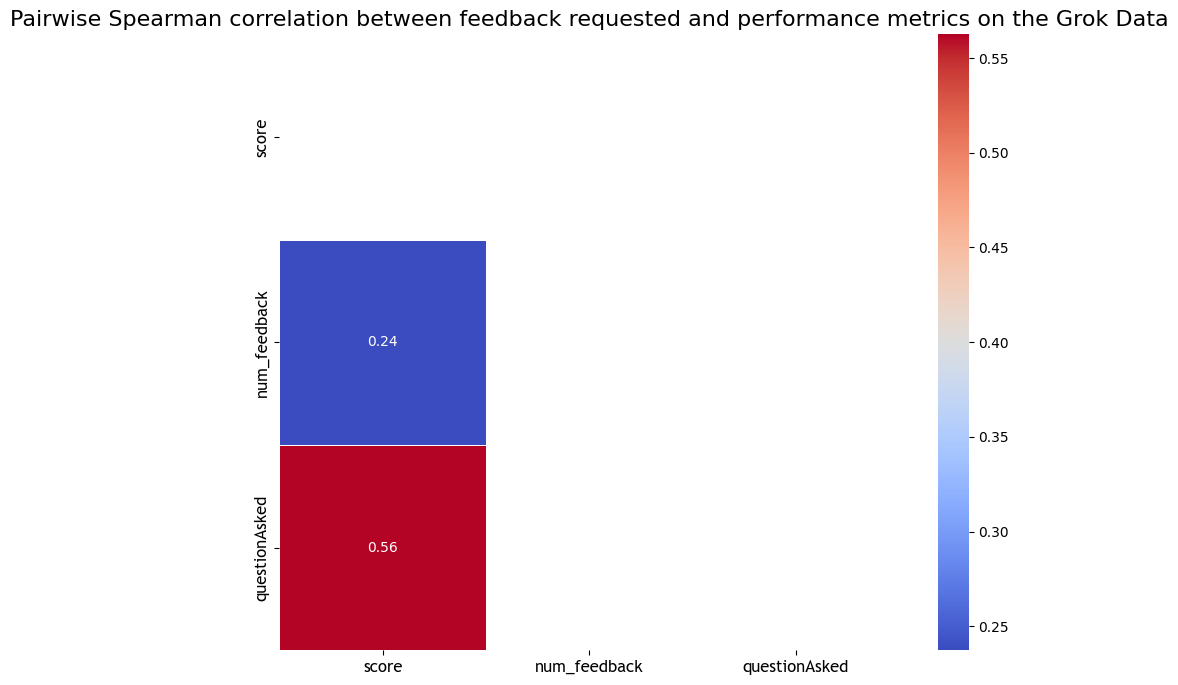

In [197]:
# Create a mask for upper triangular portion
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a correlation heatmap with improved theme
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)

# Set the title of the plot
plt.title('Pairwise Spearman correlation between feedback requested and performance metrics on the Grok Data', fontsize=16)

# # Customize the colorbar
# cbar = plt.colorbar()
# cbar.ax.tick_params(labelsize=12)

# Set the font size of the annotations
plt.xticks(fontsize=12, fontfamily="Trebuchet MS")
plt.yticks(fontsize=12, fontfamily="Trebuchet MS")

# Display the plot
plt.show()

In [198]:
reduced = data[["user_id", "questionAsked", "num_feedback", "score", "pass_num", "pass_rate"]].copy().groupby("user_id").max().reset_index()
reduced.fillna(0, inplace=True)
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12898 entries, 0 to 12897
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        12898 non-null  object 
 1   questionAsked  12898 non-null  int64  
 2   num_feedback   12898 non-null  float64
 3   score          12898 non-null  int64  
 4   pass_num       12898 non-null  float64
 5   pass_rate      12898 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 604.7+ KB


In [199]:
reduced.head()

,user_id,questionAsked,num_feedback,score,pass_num,pass_rate
0,0008c93cbc047666cab8ec9b06e7fb43,1,1.0,399,1.0,1.0
1,00093daf36073e2aeb7b2723135c21d1,0,0.0,339,0.0,0.0
2,000b51052a5e303dcefc14e077044865,1,8.0,200,2.0,1.0
3,000c11bdc5aa25d11cb9d5c7b268b13b,0,0.0,0,0.0,0.0
4,0017e1dfb8022a9cc4376edf1a72249d,0,0.0,0,0.0,0.0


In [200]:
# --------------------- RQ_3 Starts Here ---------------------

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


X = reduced[['num_feedback']]  # Features
y = reduced['score']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 20778.392682315334
R-squared Score: 0.08994607138528854


In [201]:
# --------------------- RQ_2 Starts Here ---------------------
filter_nonAsked = reduced[reduced['questionAsked'] != 0]
filter_nonAsked.head()

,user_id,questionAsked,num_feedback,score,pass_num,pass_rate
0,0008c93cbc047666cab8ec9b06e7fb43,1,1.0,399,1.0,1.0
2,000b51052a5e303dcefc14e077044865,1,8.0,200,2.0,1.0
6,0021f5a039370431c495ecbf719ac6ca,1,1.0,84,0.0,0.0
13,003c4047ee396a6cfa83dc98b8351125,1,1.0,210,0.0,0.0
23,007bfc0f9d2d037021cb896295b1b1e0,1,5.0,240,3.0,1.0


In [202]:
# --------------------- RQ_2 Starts Here ---------------------
filter_nofeedback = filter_nonAsked[filter_nonAsked['num_feedback'] != 0]
filter_nofeedback.head()

,user_id,questionAsked,num_feedback,score,pass_num,pass_rate
0,0008c93cbc047666cab8ec9b06e7fb43,1,1.0,399,1.0,1.0
2,000b51052a5e303dcefc14e077044865,1,8.0,200,2.0,1.0
6,0021f5a039370431c495ecbf719ac6ca,1,1.0,84,0.0,0.0
13,003c4047ee396a6cfa83dc98b8351125,1,1.0,210,0.0,0.0
23,007bfc0f9d2d037021cb896295b1b1e0,1,5.0,240,3.0,1.0


In [203]:
sorted_data = filter_nofeedback.sort_values(by=['num_feedback', 'pass_num'], ascending=[True, False])
sorted_data

,user_id,questionAsked,num_feedback,score,pass_num,pass_rate
900,12083ee994033e6960905c409cce3bf5,1,1.0,410,3.0,1.0
10312,cc905124013067c18884629d21c8f9b6,1,1.0,400,3.0,1.0
11341,e0528371a9728d70a80c75011cb56847,1,1.0,389,3.0,1.0
1191,183dc56762249006d29bb5b7b92336bf,1,1.0,368,2.0,1.0
2122,2a0773cffff982181a8d6a758d30dbe9,1,1.0,0,2.0,1.0
...,...,...,...,...,...,...
8384,a5d4c3bb8f36b034cc199ce36f231f5a,1,145.0,404,15.0,1.0
5084,64c99a98fdf1a8b73b6eb7d8f6052e8c,1,162.0,248,32.0,1.0
9854,c410bdea8abd6f344d9d06e96679f4db,1,178.0,390,23.0,1.0
1804,241435472d51504a09225aba515e3a9e,1,232.0,410,14.0,1.0


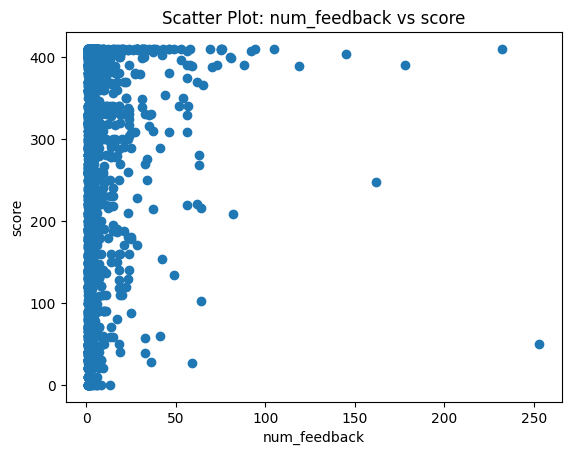

In [204]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "df"
x = sorted_data['num_feedback']
y = sorted_data['score']

plt.scatter(x, y)
plt.xlabel('num_feedback')
plt.ylabel('score')
plt.title('Scatter Plot: num_feedback vs score')
plt.show()

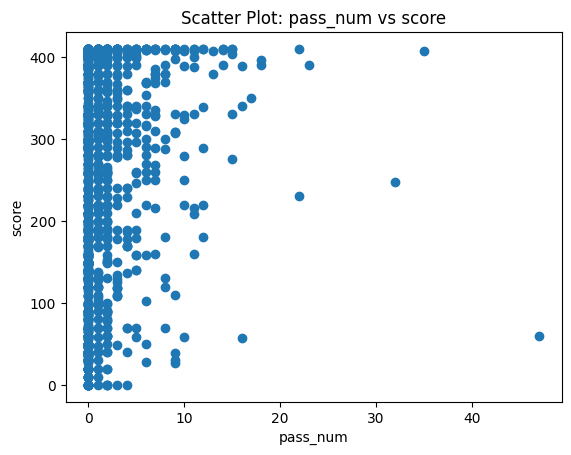

In [205]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "df"
x = sorted_data['pass_num']
y = sorted_data['score']

plt.scatter(x, y)
plt.xlabel('pass_num')
plt.ylabel('score')
plt.title('Scatter Plot: pass_num vs score')
plt.show()

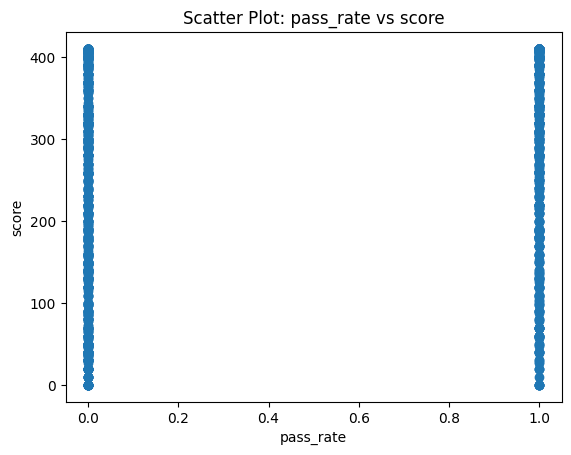

In [206]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "df"
x = sorted_data['pass_rate']
y = sorted_data['score']

plt.scatter(x, y)
plt.xlabel('pass_rate')
plt.ylabel('score')
plt.title('Scatter Plot: pass_rate vs score')
plt.show()